In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tzuk import createLabels


In [2]:
csv_path = './data/diabetic_data.csv'
data = createLabels(csv_path)

59781


In [3]:
data

,encounter_id,patient_nbr,race,gender,age_group,admission_type_id,admission_source_id,payer_code,number_diagnoses,change,diabetesMed,readmitted,readmitted_less_than_30
20446,72091308,20123568,Caucasian,Female,4,1,7,2,9,True,True,NO,False
20737,72848634,20377854,Caucasian,Female,4,2,1,2,6,False,True,NO,False
20824,73062156,20408121,Caucasian,Female,4,1,7,2,6,False,True,NO,False
21083,73731852,20542797,Caucasian,Male,4,1,7,2,6,True,True,NO,False
23668,80820942,20514150,Caucasian,Female,4,2,1,2,4,True,True,<30,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101751,443835140,175326800,Caucasian,Male,4,3,1,2,16,True,True,NO,False
101752,443835512,139605341,Other,Female,3,3,1,2,8,True,True,NO,False
101755,443842022,188574944,Other,Female,3,1,7,2,9,True,True,>30,False
101756,443842070,140199494,Other,Female,4,1,7,2,9,False,True,>30,False


20446     NaN
20737     NaN
20824     NaN
21083     NaN
23668     NaN
         ... 
101751    NaN
101752    NaN
101755    NaN
101756    NaN
101758    NaN
Name: payer_code, Length: 59781, dtype: object

In [25]:
# encode integer into strings
data_string = data.copy()
payer_code_map = {'1' :'self','2' : 'mid_class_insurance', '3' : 'premium'}
data_string['payer_code'] = data['payer_code'].map(payer_code_map)
data_string['payer_code']
gender_map = {'Male': 0, 'Female': 1}
data_string['gender'] = data['gender'].map(gender_map)
['gender']
data_string

,encounter_id,patient_nbr,race,gender,age_group,admission_type_id,admission_source_id,payer_code,number_diagnoses,change,diabetesMed,readmitted,readmitted_less_than_30
20446,72091308,20123568,Caucasian,1,4,1,7,mid_class_insurance,9,True,True,NO,False
20737,72848634,20377854,Caucasian,1,4,2,1,mid_class_insurance,6,False,True,NO,False
20824,73062156,20408121,Caucasian,1,4,1,7,mid_class_insurance,6,False,True,NO,False
21083,73731852,20542797,Caucasian,0,4,1,7,mid_class_insurance,6,True,True,NO,False
23668,80820942,20514150,Caucasian,1,4,2,1,mid_class_insurance,4,True,True,<30,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101751,443835140,175326800,Caucasian,0,4,3,1,mid_class_insurance,16,True,True,NO,False
101752,443835512,139605341,Other,1,3,3,1,mid_class_insurance,8,True,True,NO,False
101755,443842022,188574944,Other,1,3,1,7,mid_class_insurance,9,True,True,>30,False
101756,443842070,140199494,Other,1,4,1,7,mid_class_insurance,9,False,True,>30,False


In [26]:
# encode catigorized data into columns
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
transformed = ohe.fit_transform(data_string[['race','payer_code']])
categories = np.hstack(ohe.categories_)
transformed_df = pd.DataFrame(transformed, columns=categories)
data_encoded = pd.concat([data_string.drop(['race','payer_code','patient_nbr','encounter_id'], axis=1).reset_index(drop=True), transformed_df], axis=1)
data_encoded



,gender,age_group,admission_type_id,admission_source_id,number_diagnoses,change,diabetesMed,readmitted,readmitted_less_than_30,AfricanAmerican,Asian,Caucasian,Hispanic,Other,mid_class_insurance,premium,self
0,1,4,1,7,9,True,True,NO,False,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1,4,2,1,6,False,True,NO,False,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1,4,1,7,6,False,True,NO,False,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0,4,1,7,6,True,True,NO,False,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1,4,2,1,4,True,True,<30,False,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59776,0,4,3,1,16,True,True,NO,False,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
59777,1,3,3,1,8,True,True,NO,False,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
59778,1,3,1,7,9,True,True,>30,False,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
59779,1,4,1,7,9,False,True,>30,False,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = data_encoded.drop(['readmitted', 'readmitted_less_than_30'], axis = 1)
y = data_encoded['readmitted_less_than_30'].astype('bool')
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# Initialize a Random Forest
rf = RandomForestClassifier(max_features=0.5, n_estimators=700, random_state=0, n_jobs=-1)

# Train the model
rf.fit(X_train, y_train)


RandomForestClassifier(max_features=0.5, n_estimators=700, n_jobs=-1,
                       random_state=0)

In [57]:
from sklearn.metrics import classification_report

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.95      1.00      0.97     17009
        True       0.08      0.00      0.01       926

    accuracy                           0.95     17935
   macro avg       0.52      0.50      0.49     17935
weighted avg       0.90      0.95      0.92     17935



In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9466964036799554

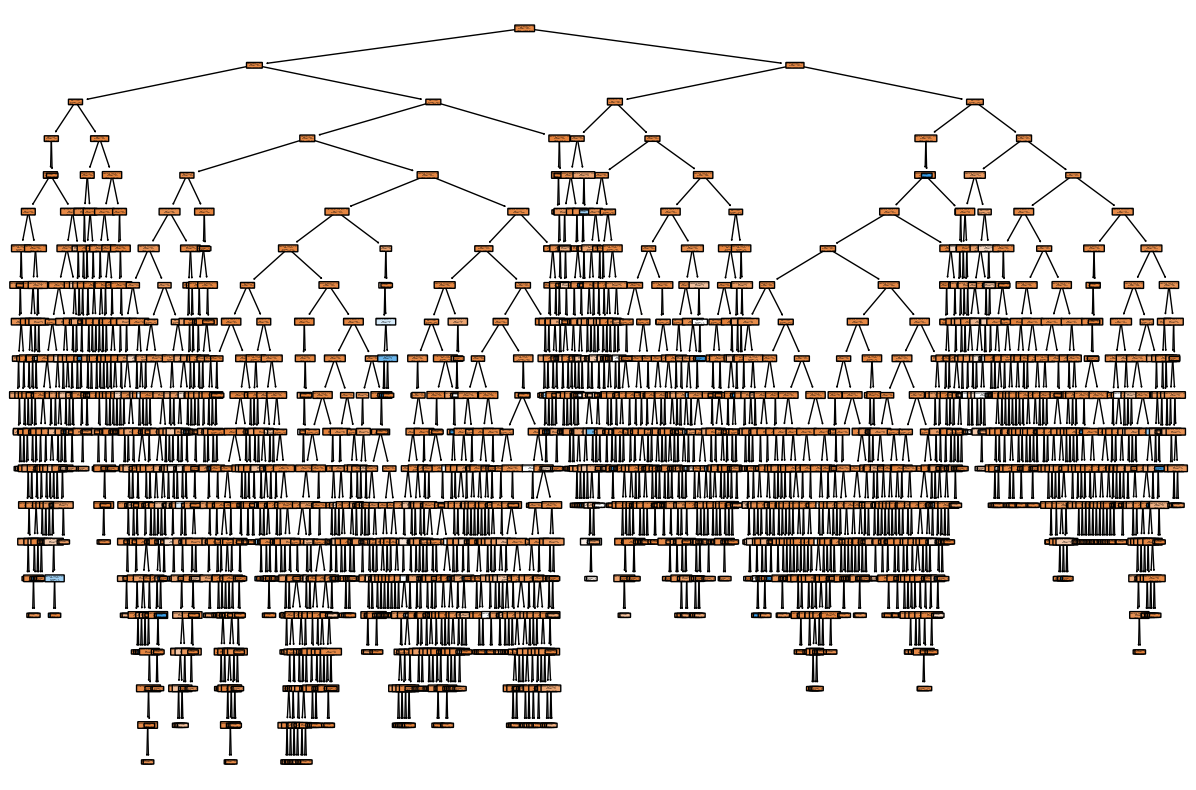

In [54]:
from sklearn import tree
import matplotlib.pyplot as plt
estimator = rf.estimators_[6]

# Visualize the tree using plot_tree
plt.figure(figsize=(15,10))
tree.plot_tree(estimator, 
                feature_names = data_encoded.columns,
               filled = True,
               impurity = True,
               rounded = True)
plt.show()